<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

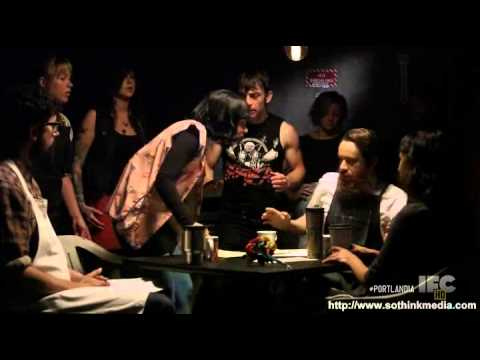

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\sahmj\\Documents\\DSPT8-Unit-4-ML\\DS-Unit-4-Sprint-1-NLP-main\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# Look at some of the full reviews:
shops['full_review_text'].sample(10)

106      2/14/2016 2 check-ins Super cute place, and m...
6949     2/28/2015 Macarons macarons macarons! Who doe...
1109     10/25/2016 1 check-in Ok, let's try this appr...
3286     8/26/2016 the two times i've visited austin i...
7009     7/10/2012 1 check-in Who woulda thunk this li...
900      2/27/2015 Get the iced Cassandra!!!!  I could...
3959     9/2/2014 I am finally done with this place wh...
4678     9/3/2016 1 check-in Great location, small spa...
5130     9/14/2014 1 check-in I've been here multiple ...
820      2/22/2015 Really great spot!    I haven't bee...
Name: full_review_text, dtype: object

In [5]:
# Import required libraries:
import numpy as np
from collections import Counter

# Plotting dependencies:
import squarify
import matplotlib.pyplot as plt 
import seaborn as sns

# NLP libraries:
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

In [8]:
def tokenize(text):
    '''
    Parses a string into a list of semantic units (words)

    Args:
        text (str): The string the function will tokenize.

    Returns:
        list: Tokens parsed out by the mechanics of your choice.
    '''
    tokens = re.sub('[^a-zA-Z]', ' ', text)
    tokens = tokens.lower().split()

    return tokens

In [9]:
# Split on spaces, lowercase all, remove punctuation and dates and numbers:
shops['review_tokens'] = shops['full_review_text'].apply(tokenize)

# Check my work:
shops['review_tokens'].head()

0    [check, in, love, love, loved, the, atmosphere...
1    [listed, in, date, night, austin, ambiance, in...
2    [check, in, listed, in, brunch, spots, i, love...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [check, in, they, are, located, within, the, n...
Name: review_tokens, dtype: object

In [10]:
print(shops.shape)
shops.head()

(7616, 4)


,coffee_shop_name,full_review_text,star_rating,review_tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[check, in, love, love, loved, the, atmosphere..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[check, in, listed, in, brunch, spots, i, love..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[check, in, they, are, located, within, the, n..."


In [11]:
# Look at the value counts of the star_rating column:
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [12]:
# Remove the words "star rating" from the star_rating column, it is redundant:
shops['star_rating'] = shops['star_rating'].str.rstrip('.0 star rating').str.lstrip(' ')

# Check my work:
shops['star_rating'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: star_rating, dtype: int64

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [13]:
# Check the data type of the star_rating column:
shops['star_rating'].dtype

dtype('O')

In [14]:
# Change star_rating to ints:
shops['star_rating'] = shops['star_rating'].astype(int)

# Check my work:
shops['star_rating'].dtype

dtype('int32')

In [15]:
# Create 2 new bool features for the best and worst coffee shops based on ratings:
# Best is True if rating == 4 or 5
shops['is_best'] = np.where(shops['star_rating'] >= 4, 1, 0)
shops['not_good'] = np.where(shops['star_rating'] < 4, 1, 0)

# Check my work:
print(shops.shape)
shops.head()

(7616, 6)


,coffee_shop_name,full_review_text,star_rating,review_tokens,is_best,not_good
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5,"[check, in, love, love, loved, the, atmosphere...",1,0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4,"[listed, in, date, night, austin, ambiance, in...",1,0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4,"[check, in, listed, in, brunch, spots, i, love...",1,0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2,"[very, cool, decor, good, drinks, nice, seatin...",0,1
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4,"[check, in, they, are, located, within, the, n...",1,0


In [16]:
def count(docs):
    '''
    This function will take a list of tokenized documents as input 
    and returns a DataFrame with frequency counts and rank for each token.

    Args:
        docs (list): tokenized list of documents

    Returns:
        wc: DataFrame sorted by rank
    '''
    # Instaniate Counter objects:
    word_cts = Counter()
    appears_in = Counter()

    # Get the total number of documents:
    tot_docs = len(docs)

    # Iterate through each document to get the word counts:
    for doc in docs:
        word_cts.update(doc)
        appears_in.update(set(doc))

    # Create a 2d list of the word and it's count:
    temp = zip(word_cts.keys(), word_cts.values())

    # Turn into a DataFrame:
    wc = pd.DataFrame(temp, columns=['word', 'count'])

    # Rank the words and return a sum for each word:
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    tot = wc['count'].sum()

    # Get the percentage of how often the word appears:
    wc['pct_tot'] = wc['count'].apply(lambda x: x / tot)

    # Get the cumulative percentages sorted by rank:
    wc = wc.sort_values(by='rank')
    wc['cum_pct_tot'] = wc['pct_tot'].cumsum()

    # Create a 2d list of words and how often they occur, turn into a df:
    temp2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(temp2, columns=['word', 'appears_in'])

    # Merge the 2 DataFrames into 1:
    wc = ac.merge(wc, on='word')

    # Get the percentage of the appears_in column:
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / tot_docs)

    # Return the DataFrame with the values sorted by rank:
    return wc.sort_values(by='rank')

In [17]:
# Use the function:
wc = count(shops['review_tokens'])
print(wc.shape)
wc.head()

(16847, 7)


,word,appears_in,count,rank,pct_tot,cum_pct_tot,appears_in_pct
43,the,6854,34909,1.0,0.044008,0.044008,0.899947
25,and,6869,26774,2.0,0.033753,0.077761,0.901917
20,i,5877,24630,3.0,0.031050,0.108810,0.771665
2,a,6250,22857,4.0,0.028815,0.137625,0.820641
23,to,5676,17345,5.0,0.021866,0.159491,0.745273


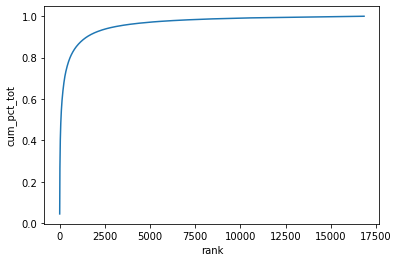

In [18]:
# Visualize the cumulative distribution:
sns.lineplot(x='rank', y='cum_pct_tot', data=wc);

In [19]:
# Look at the percentage of the top 100 words in the dataset vs all words in the dataset:
wc[wc['rank'] <= 100]['cum_pct_tot'].max()

0.55553468483176

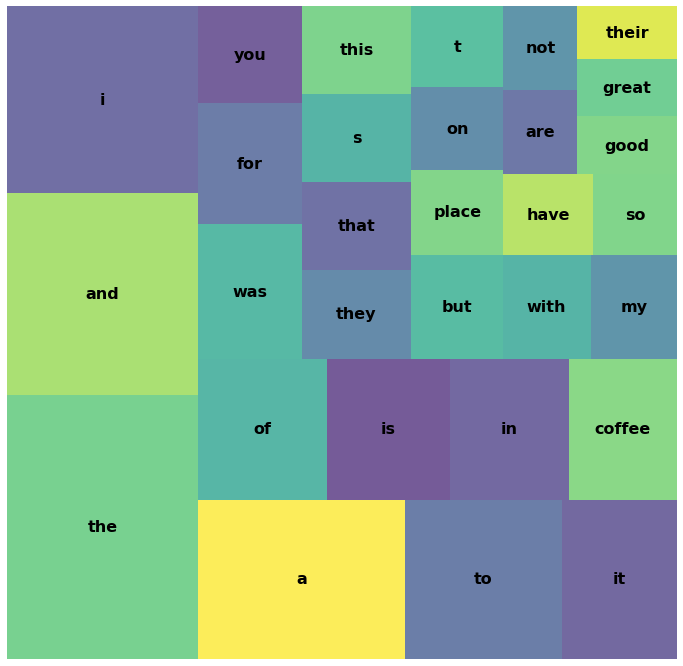

In [21]:
# Look at the top 30 words in a plot:
wc_top30 = wc[wc['rank'] <= 30]

plt.figure(figsize=(12, 12))
squarify.plot(sizes=wc_top30['pct_tot'], label=wc_top30['word'], 
              alpha=.75, text_kwargs={'size': 16, 'weight': 'bold'})
plt.axis('off');

In [22]:
# Inialize SpaCy model and tokenizer:
nlp = spacy.load('en_core_web_md')
tokenizer = Tokenizer(nlp.vocab)

In [23]:
# Remove SpaCy default stop words from the tokens:
tokens = []

# Return lower case tokens and ignore default stop words/punctuation:
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []

    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False) & (token.is_digit == False) & (token.i >= 2):
            doc_tokens.append(token.text.lower().strip(' '))
    
    tokens.append(doc_tokens)

shops['SpaCy_sw_tokens'] = tokens
shops['SpaCy_sw_tokens'].head()

0    [check-in, love, love, loved, atmosphere!, cor...
1    [listed, date, night:, austin,, ambiance, aust...
2    [check-in, listed, brunch, spots, loved, eclec...
3    [cool, decor!, good, drinks, nice, seating, , ...
4    [check-in, located, northcross, mall, shopping...
Name: SpaCy_sw_tokens, dtype: object

In [24]:
# Get word counts with spacy default stop words removed:
spacy_sw_wc = count(shops['SpaCy_sw_tokens'])
print(spacy_sw_wc.shape)
spacy_sw_wc.head(25)

(38700, 7)


,word,appears_in,count,rank,pct_tot,cum_pct_tot,appears_in_pct
1,,4377,15835,1.0,0.039445,0.039445,0.574711
8,coffee,4210,8058,2.0,0.020073,0.059518,0.552784
127,place,3029,4264,3.0,0.010622,0.070139,0.397715
149,great,2438,3250,4.0,0.008096,0.078235,0.320116
266,it's,2061,3117,5.0,0.007764,0.086000,0.270614
176,like,2034,2902,6.0,0.007229,0.093229,0.267069
163,good,2084,2779,7.0,0.006923,0.100151,0.273634
5,check-in,1957,1961,8.0,0.004885,0.105036,0.256959
6,love,1434,1806,9.0,0.004499,0.109535,0.188288
326,i'm,1382,1797,10.0,0.004476,0.114011,0.181460


In [27]:
# Find out what the exact value is for index 1 which appears to be blank:
spacy_sw_wc['word'].loc[1]

''

In [28]:
# Add stop words to SpaCy default stop words:
STOP_WORDS = nlp.Defaults.stop_words.union(["coffee", " ", "it's", "i'm", "i've", "check-in", "check-ins", "don't", "place", "listed", "good", "great", "like", "love", "loves", "loved", "got", "coffee.", ","])

# Remove SpaCy default stop words plus my own from the tokens:
tokens2 = []

# Return lower case tokens and ignore default stop words/punctuation/digits/dates:
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens2 = []

    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False) & (token.is_digit == False) & (token.i >= 2):
            
            doc_tokens2.append(token.text.lower())
    
    tokens2.append(doc_tokens2)
            

shops['SpaCy_custom_tokens'] = tokens2
shops['SpaCy_custom_tokens'].head(25)

0     [atmosphere!, corner, shop, style,, swings!!!,...
1     [date, night:, austin,, ambiance, austin, beau...
2     [brunch, spots, eclectic, homey, plush, decor,...
3     [cool, decor!, drinks, nice, seating, however....
4     [located, northcross, mall, shopping, center, ...
5     [cute, cafe!, think, moment, stepped, in,, was...
6     ["nuptial, bliss!",, anderson, lane, new, blac...
7     [place!, stars, cleanliness, stars, fun, ambia...
8     [ok,, let's, try, approach..., pros:, music, s...
9     [shown, social, media, days, finally, visited!...
10    [americano, average, cute, study, spot, cafe.,...
11    [store, a+, decoration,, honestly,, shop, surr...
12    [time, charm!, factory, a+, decor, innovative,...
13    [cute, little, cafe!, driven, times, hadn't, n...
14    [beautiful, eccentric, shop, library, peculiar...
15    [search, fantastic, so,, didn't, want, write, ...
16    [atmosphere, here!, frequent, shops, definitel...
17    [check, video, review!, youtube.com/watch?

In [29]:
spacy_custom_wc = count(shops['SpaCy_custom_tokens'])
print(spacy_custom_wc.shape)
spacy_custom_wc.head()

(38696, 7)


,word,appears_in,count,rank,pct_tot,cum_pct_tot,appears_in_pct
768,little,1230,1479,1.0,0.004234,0.004234,0.161502
170,nice,1188,1368,2.0,0.003916,0.008150,0.155987
463,food,1092,1363,3.0,0.003902,0.012051,0.143382
590,time,1099,1345,4.0,0.003850,0.015902,0.144301
35,pretty,1066,1339,5.0,0.003833,0.019735,0.139968


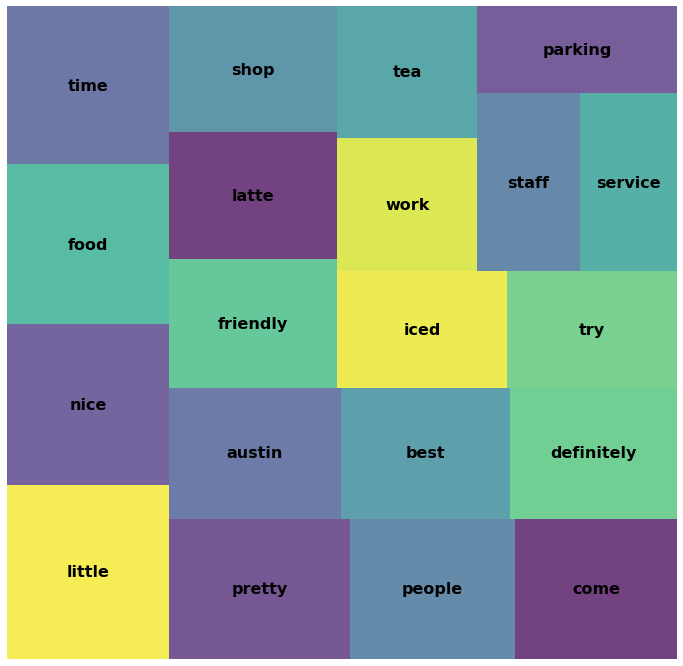

In [30]:
spacy_custom_wc_top20 = spacy_custom_wc[spacy_custom_wc['rank'] <= 20]

plt.figure(figsize=(12,12))
squarify.plot(sizes=spacy_custom_wc_top20['pct_tot'],
              label=spacy_custom_wc_top20['word'],
              alpha=.75, text_kwargs={'size': 16, 'weight': 'bold'})
plt.axis('off');

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [31]:
# Look at the dataframe now:
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_tokens,is_best,not_good,SpaCy_sw_tokens,SpaCy_custom_tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5,"[check, in, love, love, loved, the, atmosphere...",1,0,"[check-in, love, love, loved, atmosphere!, cor...","[atmosphere!, corner, shop, style,, swings!!!,..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4,"[listed, in, date, night, austin, ambiance, in...",1,0,"[listed, date, night:, austin,, ambiance, aust...","[date, night:, austin,, ambiance, austin, beau..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4,"[check, in, listed, in, brunch, spots, i, love...",1,0,"[check-in, listed, brunch, spots, loved, eclec...","[brunch, spots, eclectic, homey, plush, decor,..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2,"[very, cool, decor, good, drinks, nice, seatin...",0,1,"[cool, decor!, good, drinks, nice, seating, , ...","[cool, decor!, drinks, nice, seating, however...."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4,"[check, in, they, are, located, within, the, n...",1,0,"[check-in, located, northcross, mall, shopping...","[located, northcross, mall, shopping, center, ..."


(38696, 7) (32702, 7) (15491, 7)


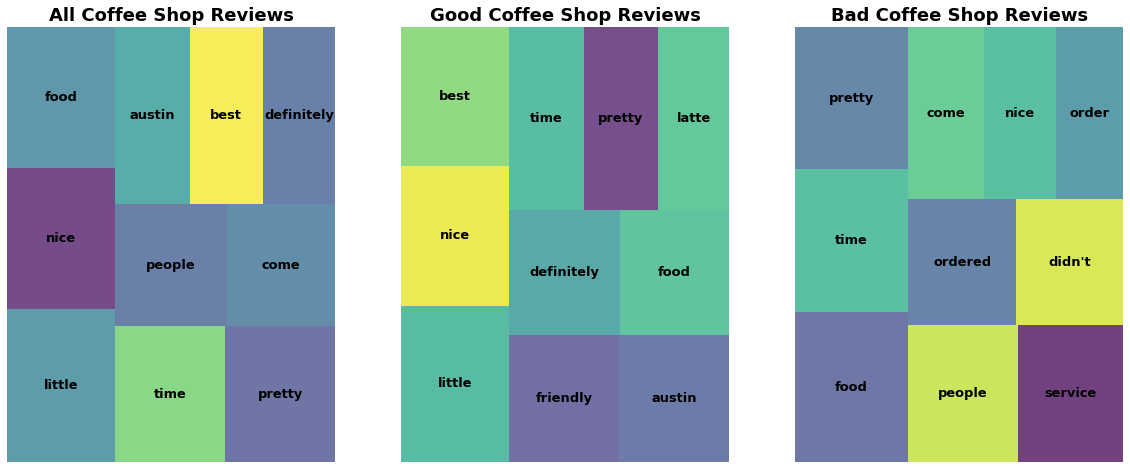

In [38]:
wc_good = count(shops[shops['is_best'] == 1]['SpaCy_custom_tokens'])
wc_bad = count(shops[shops['not_good'] == 1]['SpaCy_custom_tokens'])
print(spacy_custom_wc.shape, wc_good.shape, wc_bad.shape)

# Plot the top 10 words for each set of data:
custom_wc_top10 = spacy_custom_wc[spacy_custom_wc['rank'] <= 10]
wc_good_top10 = wc_good[wc_good['rank'] <= 10]
wc_bad_top10 = wc_bad[wc_bad['rank'] <= 10]

fig, ax = plt.subplots(1, 3, figsize=(20, 8))

ax[0].set_title('All Coffee Shop Reviews', weight='bold', size=18)
squarify.plot(sizes=custom_wc_top10['pct_tot'], 
              label=custom_wc_top10['word'],
              alpha=.75, ax=ax[0], text_kwargs={'size': 13, 'weight': 'bold'})
ax[0].axis('off')

ax[1].set_title('Good Coffee Shop Reviews', weight='bold', size=18)
squarify.plot(sizes=wc_good_top10['pct_tot'], 
              label=wc_good_top10['word'],
              alpha=.75, ax=ax[1], text_kwargs={'size': 13, 'weight': 'bold'})
ax[1].axis('off')

ax[2].set_title('Bad Coffee Shop Reviews', weight='bold', size=18)
squarify.plot(sizes=wc_bad_top10['pct_tot'], 
              label=wc_bad_top10['word'],
              alpha=.75, ax=ax[2], text_kwargs={'size': 13, 'weight': 'bold'})
ax[2].axis('off');

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

